In [2]:
# Importaciones y carga de datos
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
sns.set(style='whitegrid')

# Determinar raíz del repo (dos niveles arriba del directorio del notebook)
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
processed_dir = os.path.join(repo_root, 'data', 'processed')

# Intentamos encontrar el archivo solicitado y variantes conocidas en el repo
candidates = [
    os.path.join(processed_dir, 'enginereed_football_data_cleaned_all.csv'),
    os.path.join(processed_dir, 'engineered_football_data_cleaned_all.csv'),
    os.path.join(processed_dir, 'engineered_footbal_data_cleaned_all.csv')  # nombre actual en el pipeline
]
existing = None
for p in candidates:
    if os.path.exists(p):
        existing = p
        break

if existing is None:
    raise FileNotFoundError(f'No se encontró el CSV de entrada en {processed_dir}.')

print(f'Usando archivo: {existing}')
df = pd.read_csv(existing, low_memory=False)
print(f'Shape: {df.shape}')
df.head(3)

Usando archivo: c:\Users\andre\Desktop\proyectos\empateitor\data\processed\engineered_footbal_data_cleaned_all.csv
Shape: (203136, 131)


,Season,Division,Competition,Div,Date,HomeTeam,AwayTeam,AR,AY,FTAG,FTHG,FTR,HR,HTAG,HTHG,HTR,HY,ODDS_H,ODDS_D,ODDS_A,match_id,home_goals_for_ma_5,home_goals_against_ma_5,home_goal_diff_ma_5,home_points_ma_5,home_is_draw_ma_5,home_red_cards_ma_5,home_yellow_cards_ma_5,home_matches_played_5,home_gf_last5,home_ga_last5,home_pts_last5,home_last_points,home_last_goal_diff,home_last_is_draw,home_gf_last5_homeonly,home_ga_last5_homeonly,home_pts_last5_homeonly,home_gf_last5_awayonly,home_ga_last5_awayonly,home_pts_last5_awayonly,home_gf_home_season_todate,home_ga_home_season_todate,home_pts_home_season_todate,home_gf_away_season_todate,home_ga_away_season_todate,home_pts_away_season_todate,home_pts_season_td,home_matches_played_overall_season_td,home_matches_played_home_season_td,home_matches_played_away_season_td,home_ppg_season_td,home_ppg_home_season_td,home_ppg_away_season_td,home_rest_days,home_goals_total_match,home_goals_total_median_5,home_goals_total_std_5,home_pts_last5_z,home_gf_last5_z,home_ga_last5_z,home_goals_total_median_5_z,away_goals_for_ma_5,away_goals_against_ma_5,away_goal_diff_ma_5,away_points_ma_5,away_is_draw_ma_5,away_red_cards_ma_5,away_yellow_cards_ma_5,away_matches_played_5,away_gf_last5,away_ga_last5,away_pts_last5,away_last_points,away_last_goal_diff,away_last_is_draw,away_gf_last5_homeonly,away_ga_last5_homeonly,away_pts_last5_homeonly,away_gf_last5_awayonly,away_ga_last5_awayonly,away_pts_last5_awayonly,away_gf_home_season_todate,away_ga_home_season_todate,away_pts_home_season_todate,away_gf_away_season_todate,away_ga_away_season_todate,away_pts_away_season_todate,away_pts_season_td,away_matches_played_overall_season_td,away_matches_played_home_season_td,away_matches_played_away_season_td,away_ppg_season_td,away_ppg_home_season_td,away_ppg_away_season_td,away_rest_days,away_goals_total_match,away_goals_total_median_5,away_goals_total_std_5,away_pts_last5_z,away_gf_last5_z,away_ga_last5_z,away_goals_total_median_5_z,h2h_home_gf_5y,h2h_home_ga_5y,h2h_home_pts_5y,h2h_away_gf_5y,h2h_away_ga_5y,h2h_away_pts_5y,h2h_meetings_5y,h2h_draws_5y,prob_h,prob_d,prob_a,bookmaker_margin,odds_ha_prob_spread,odds_draw_over_mean_ha,odds_draw_ratio_ha,odds_draw_vs_max_ha,form_diff_pts5_abs,form_diff_gd5_abs,goals_total_last5,draw_tendency_mean_5,draw_tendency_diff_5,h2h_draw_rate_5y,pts_last5_diff,gf_last5_diff,ga_last5_diff,rest_days_diff,ppg_diff_season_td,ppg_homeaway_ctx_diff_season_td
0,93-94,1,premier_ligue,E1,1993-08-14,Barnsley,West Brom,0.0,2.0,1.0,1.0,D,0.0,1.0,1.0,D,1.0,2.15,3.4,3.3,95538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437854,0.276878,0.285268,0.062264,0.152585,-0.084683,0.765785,-0.160976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93-94,1,premier_ligue,E1,1993-08-14,Charlton,Birmingham,0.0,2.0,0.0,1.0,H,0.0,0.0,1.0,H,1.0,2.15,3.4,3.3,95539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437854,0.276878,0.285268,0.062264,0.152585,-0.084683,0.765785,-0.160976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93-94,1,premier_ligue,E1,1993-08-14,Crystal Palace,Tranmere,0.0,2.0,0.0,0.0,D,0.0,0.0,0.0,D,1.0,2.15,3.4,3.3,95540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Comprobación y aseguramiento de nulos
Verificamos que no haya valores nulos. Si aparecen, los imputamos de forma conservadora: 0 para numéricas y 'Unknown' para categóricas.

In [3]:
na_counts = df.isna().sum()
total_na = int(na_counts.sum())
print(f'Total NA iniciales: {total_na}')
if total_na > 0:
    num_cols = df.select_dtypes(include=[np.number]).columns
    obj_cols = df.select_dtypes(exclude=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(0)
    df[obj_cols] = df[obj_cols].fillna('Unknown')
    print('Se imputaron NA: numéricas->0, categóricas->Unknown')

# Revisión final
na_counts_post = df.isna().sum()
print('NA por columna (post):')
print(na_counts_post[na_counts_post > 0].sort_values(ascending=False))
assert int(na_counts_post.sum()) == 0, 'Quedan NA tras la imputación'
print('No hay NA en el dataset.')

Total NA iniciales: 0
NA por columna (post):
Series([], dtype: int64)
No hay NA en el dataset.


## Variable objetivo: distribución de resultados
Analizamos cuántos partidos terminan en **empate (D)**, **victoria local (H)** y **victoria visitante (A)** usando `FTR`.

Conteo por resultado:
FTR
H    90877
D    54255
A    58004
Name: count, dtype: int64
Porcentajes (%):
FTR
H    44.74
D    26.71
A    28.55
Name: count, dtype: float64


C:\Users\andre\AppData\Local\Temp\ipykernel_13624\42198459.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette=['#4CAF50','#FFC107','#F44336'])


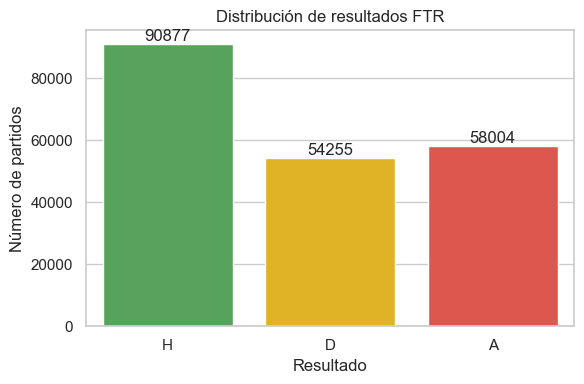

In [4]:
if 'FTR' not in df.columns:
    raise KeyError('No se encontró la columna FTR (Full-Time Result).')

ftr_clean = df['FTR'].astype(str).str.strip().str.upper()
counts = ftr_clean.value_counts().reindex(['H','D','A']).fillna(0).astype(int)
pct = (counts / counts.sum()).mul(100).round(2)
print('Conteo por resultado:')
print(counts)
print('Porcentajes (%):')
print(pct)

plt.figure(figsize=(6,4))
ax = sns.barplot(x=counts.index, y=counts.values, palette=['#4CAF50','#FFC107','#F44336'])
ax.set_title('Distribución de resultados FTR')
ax.set_xlabel('Resultado')
ax.set_ylabel('Número de partidos')
for i,v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Divisiones con mayor porcentaje de empates
Calculamos el ratio de empates por **División** (preferimos `Division`, si no existe usamos `Div`).

Div
I2     0.322387
F2     0.303624
SP2    0.299892
F1     0.276203
E3     0.275877
E1     0.274203
SC1    0.271898
I1     0.271127
D2     0.271062
E2     0.267814
G1     0.258537
EC     0.255941
SP1    0.253759
T1     0.252315
P1     0.251439
B1     0.250392
D1     0.248668
E0     0.248015
SC0    0.241822
N1     0.231744
Name: is_draw, dtype: float64


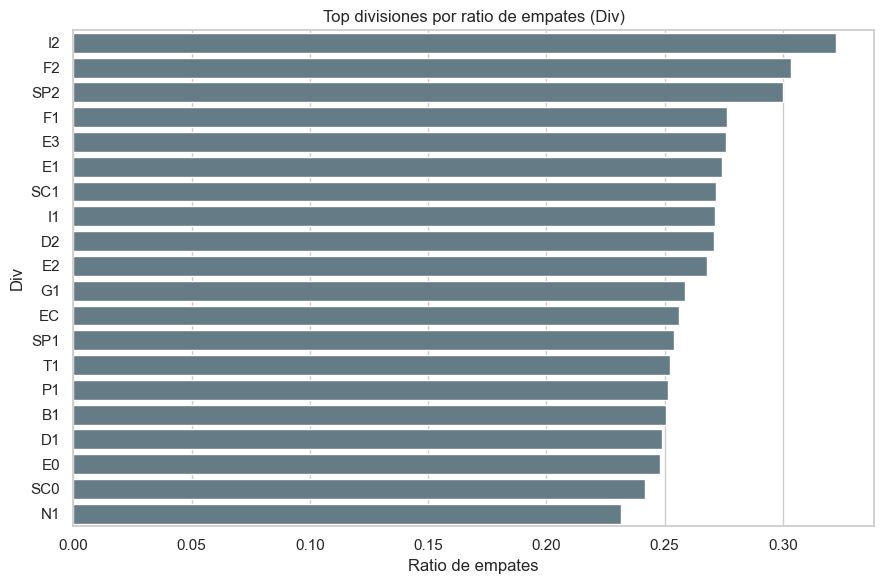

In [8]:
# Análisis por división usando la columna 'Div'
if 'Div' not in df.columns:
    raise KeyError("No se encontró la columna 'Div' en el dataset")

is_draw = ftr_clean.eq('D')
df_draw = df.assign(is_draw=is_draw)
draw_ratio_by_div = df_draw.groupby('Div', dropna=False)['is_draw'].mean().sort_values(ascending=False)
print(draw_ratio_by_div.head(20))

top_div = draw_ratio_by_div.head(20)
plt.figure(figsize=(9,6))
sns.barplot(y=top_div.index, x=top_div.values, orient='h', color='#607D8B')
plt.title('Top divisiones por ratio de empates (Div)')
plt.xlabel('Ratio de empates')
plt.ylabel('Div')
plt.tight_layout()
plt.show()

Competition
serie_a                 0.298084
ligue_1                 0.289627
la_liga                 0.278651
premier_ligue           0.266552
bundesliga              0.259628
superliga_griega        0.258537
superliga_turca         0.252315
primeira_liga           0.251439
belgian_pro_league      0.250392
scottish_premiership    0.241324
eredivisie              0.231744
Name: is_draw, dtype: float64


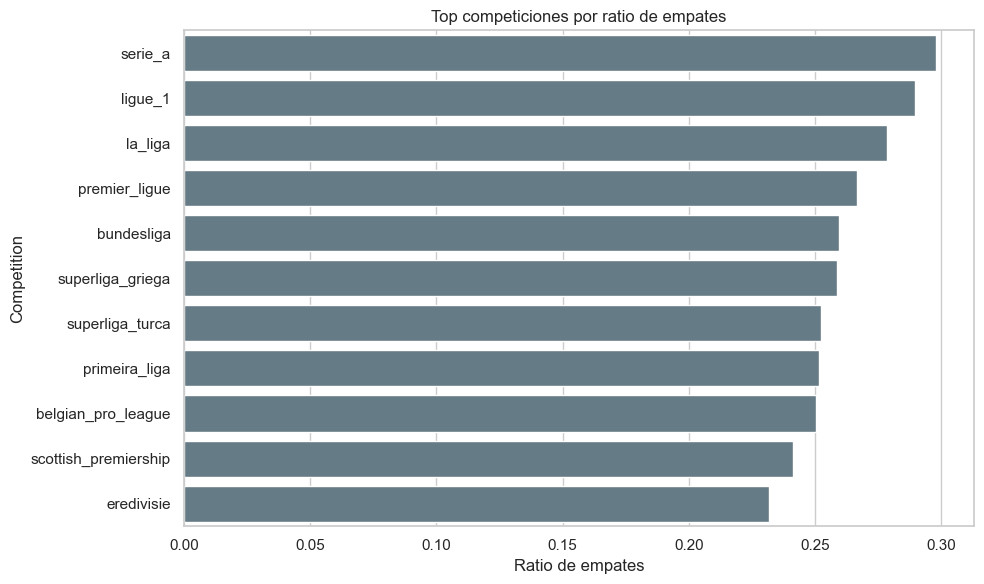

In [9]:
# Ratio de empates por competición (Competition)
if 'Competition' not in df.columns:
    raise KeyError("No se encontró la columna 'Competition' en el dataset")

is_draw = ftr_clean.eq('D')
df_draw = df.assign(is_draw=is_draw)
draw_ratio_by_comp = df_draw.groupby('Competition', dropna=False)['is_draw'].mean().sort_values(ascending=False)
print(draw_ratio_by_comp.head(20))

top_comp = draw_ratio_by_comp.head(20)
plt.figure(figsize=(10,6))
sns.barplot(y=top_comp.index, x=top_comp.values, orient='h', color='#607D8B')
plt.title('Top competiciones por ratio de empates')
plt.xlabel('Ratio de empates')
plt.ylabel('Competition')
plt.tight_layout()
plt.show()

## Evolución de empates por temporada
Observamos cómo han evolucionado los empates a lo largo del tiempo por `Season`. Además, mostramos la evolución por `Competition` para comparar ligas.

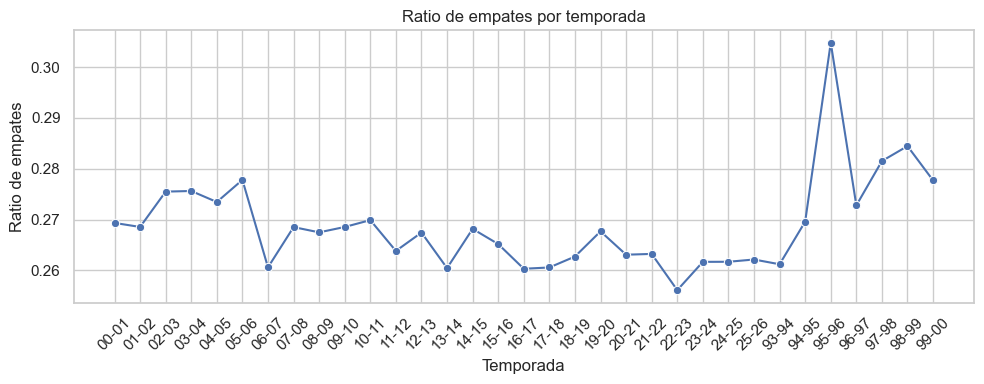

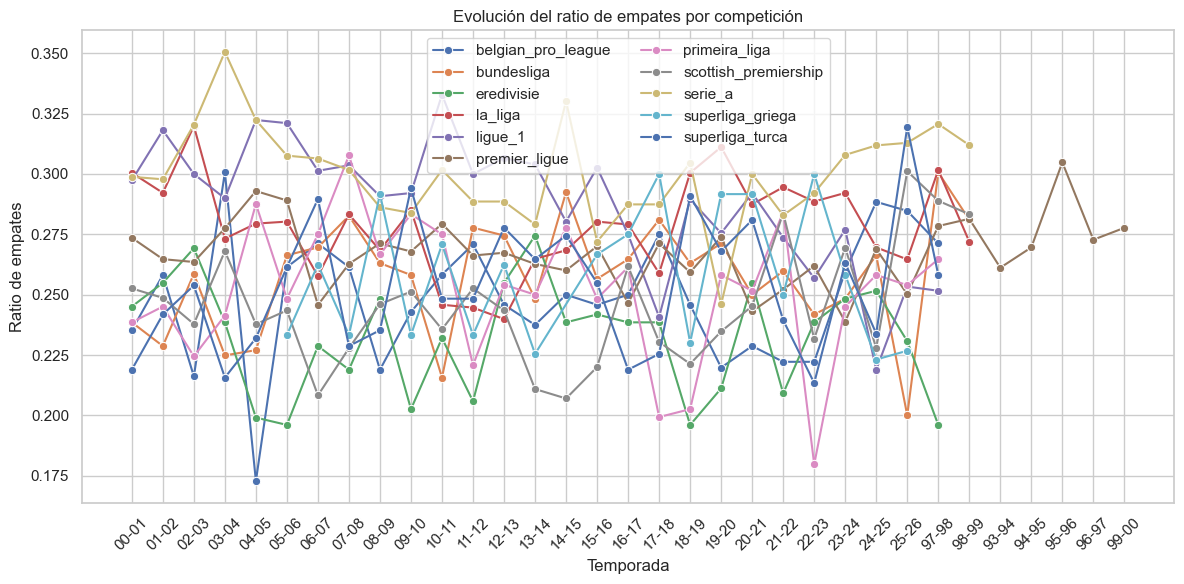

In [6]:
if 'Season' not in df.columns:
    raise KeyError('Season no está presente en el dataset')

is_draw = ftr_clean.eq('D')
df_draw = df.assign(is_draw=is_draw)
draw_ratio_by_season = df_draw.groupby('Season')['is_draw'].mean().sort_index()
plt.figure(figsize=(10,4))
sns.lineplot(x=draw_ratio_by_season.index, y=draw_ratio_by_season.values, marker='o')
plt.title('Ratio de empates por temporada')
plt.xlabel('Temporada')
plt.ylabel('Ratio de empates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if 'Competition' in df.columns:
    comp_season = df_draw.groupby(['Competition','Season'])['is_draw'].mean().reset_index()
    plt.figure(figsize=(12,6))
    for comp in comp_season['Competition'].unique():
        sub = comp_season[comp_season['Competition'] == comp].sort_values('Season')
        sns.lineplot(x=sub['Season'], y=sub['is_draw'], marker='o', label=str(comp))
    plt.title('Evolución del ratio de empates por competición')
    plt.xlabel('Temporada')
    plt.ylabel('Ratio de empates')
    plt.xticks(rotation=45)
    plt.legend(loc='best', ncol=2)
    plt.tight_layout()
    plt.show()

## Correlación (solo variables prepartido) con la variable objetivo
Usamos una codificación binaria de la variable objetivo enfocada en empate (`is_draw`). Excluimos variables que son resultados del partido (postpartido) y metadatos.

c:\Users\andre\Desktop\proyectos\empateitor\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2882: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\andre\Desktop\proyectos\empateitor\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2887: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


Top 25 variables por correlación absoluta con is_draw:
home_goals_total_match       -0.245379
away_goals_total_match       -0.245379
odds_draw_over_mean_ha        0.105238
prob_d                        0.105181
odds_draw_ratio_ha            0.104456
odds_draw_vs_max_ha           0.100242
ODDS_D                       -0.093442
odds_ha_prob_spread          -0.088977
ODDS_A                       -0.069478
prob_h                       -0.046873
h2h_home_gf_5y               -0.035843
h2h_away_ga_5y               -0.035843
form_diff_gd5_abs            -0.035411
home_gf_last5                -0.033246
home_goals_for_ma_5          -0.032550
ppg_diff_season_td           -0.031186
h2h_home_pts_5y              -0.030100
home_gf_away_season_todate   -0.028322
home_ppg_season_td           -0.028046
home_ppg_away_season_td      -0.027825
pts_last5_diff               -0.027601
home_gf_last5_z              -0.027586
form_diff_pts5_abs           -0.026921
home_gf_home_season_todate   -0.026290
home_gf_l

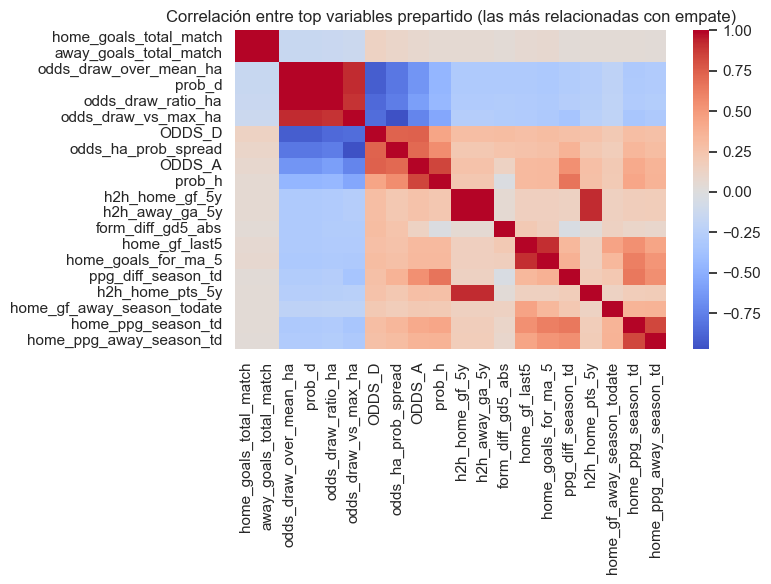

c:\Users\andre\Desktop\proyectos\empateitor\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2882: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\andre\Desktop\proyectos\empateitor\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2887: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


Top 10 correlaciones con victoria local (one-vs-rest):
prob_h                             0.296443
prob_a                            -0.283382
ODDS_A                             0.252251
ODDS_H                            -0.225875
ppg_diff_season_td                 0.202112
odds_ha_prob_spread                0.170809
odds_draw_vs_max_ha               -0.168102
ppg_homeaway_ctx_diff_season_td    0.165907
pts_last5_diff                     0.165126
away_goals_total_match             0.155088
dtype: float64
Top 10 correlaciones con victoria visitante (one-vs-rest):
prob_a                             0.292758
prob_h                            -0.280425
ODDS_H                             0.257140
ODDS_A                            -0.209632
ppg_diff_season_td                -0.191947
ppg_homeaway_ctx_diff_season_td   -0.163736
pts_last5_diff                    -0.154742
gf_last5_diff                     -0.140200
away_ppg_season_td                 0.127464
ga_last5_diff                      

In [ ]:
# Columnas claramente postpartido o no usables como features prepartido
exclude_cols = set([
    'FTR','FTHG','FTAG','HTR','HTHG','HTAG',
    'AR','AY','HR','HY',
    'Referee','Attendance',
    'HomeTeam','AwayTeam','match_id',
    'Date','Time',
    # Excluir explícitamente variables postpartido que aparecían en el top
    'home_goals_total_match','away_goals_total_match'
])

# Seleccionamos variables numéricas prepartido
numeric_cols = df.select_dtypes(include=[np.number]).columns
pre_numeric = [c for c in numeric_cols if c not in exclude_cols]

# Objetivo binario: empate sí/no
y_draw = (df['FTR'].astype(str).str.upper() == 'D').astype(int)

# Correlaciones únicamente con variables prepartido
corr_draw = pd.Series({c: df[c].corr(y_draw) for c in pre_numeric})
corr_draw = corr_draw.dropna().sort_values(key=lambda s: s.abs(), ascending=False)
print('Top 25 variables por correlación absoluta con is_draw (solo prepartido):')
print(corr_draw.head(25))

# Visualización heatmap de las 20 más correlacionadas (filtradas a prepartido)
topN = 20
top_cols = list(corr_draw.head(topN).index)
plt.figure(figsize=(8,6))
sns.heatmap(df[top_cols].corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlación entre top variables prepartido (sin postpartido)')
plt.tight_layout()
plt.show()

# Opcional: correlación con victoria local y visitante (one-vs-rest) usando solo prepartido
y_home = (ftr_clean == 'H').astype(int)
y_away = (ftr_clean == 'A').astype(int)
corr_home = pd.Series({c: df[c].corr(y_home) for c in pre_numeric}).dropna().sort_values(key=lambda s: s.abs(), ascending=False)
corr_away = pd.Series({c: df[c].corr(y_away) for c in pre_numeric}).dropna().sort_values(key=lambda s: s.abs(), ascending=False)
print('Top 10 correlaciones con victoria local (one-vs-rest, solo prepartido):')
print(corr_home.head(10))
print('Top 10 correlaciones con victoria visitante (one-vs-rest, solo prepartido):')
print(corr_away.head(10))

## Notas
- Este análisis usa únicamente variables que se conocen antes del partido para la correlación con el objetivo.
- La columna `FTR` se usa como objetivo para conteos y se deriva `is_draw` para correlación binaria.
- Si deseas profundizar por competición o ventana temporal, ajusta los agrupamientos o filtra `Competition`.

## Interpretación de las correlaciones (solo prepartido)
Este resumen interpreta las correlaciones de las variables **prepartido** con la probabilidad de empate (`is_draw`).

Importante: se **excluyen** variables postpartido que no se conocen antes del encuentro, como `home_goals_total_match` y `away_goals_total_match`.

- Odds centradas en el empate: métricas como `prob_d`, `odds_draw_ratio_ha`, `odds_draw_over_mean_ha` y `odds_draw_vs_max_ha` muestran **correlaciones positivas** con el empate. Cuanto mayor es la estimación de empate por las casas, más probable es que ocurra.
- Cuota del empate (`ODDS_D`): tiende a correlacionar **negativamente** con el empate (cuotas más altas implican menor probabilidad implícita).
- Balance de fuerzas (`odds_ha_prob_spread`): el **spread** entre probabilidades de local y visitante muestra correlación **negativa**; partidos más igualados (spread pequeño) favorecen el empate.
- Diferenciales de rendimiento: `ppg_diff_season_td`, `ppg_homeaway_ctx_diff_season_td`, `pts_last5_diff` y `gf_last5_diff` correlacionan **negativamente** con el empate; a mayor desequilibrio entre equipos, menor probabilidad de empate.
- Señales de historial/H2H: variables como `h2h_home_gf_5y` y `h2h_away_ga_5y` tienden a relacionarse **negativamente** con el empate; ventajas históricas claras reducen la probabilidad de igualada.

En conjunto, los **partidos equilibrados** (odds y métricas de rendimiento similares) muestran mayor propensión a terminar en **empate**, mientras que los **desbalances** (forma, PPG y head-to-head) reducen esa probabilidad. Estas señales son consistentes para seleccionar features prepartido de cara al modelado de empates.